In [1]:
from data import AudioDataloader, MSPPodcast
from config import load_hydra_config
from models.pitch_encoder import YINEncoder

cfg = load_hydra_config("dddm_vc_xlsr_ph.yaml")
dataloader = AudioDataloader(
    dataset=MSPPodcast(cfg.data, split="development"),
    cfg=cfg.data.dataloader,
    batch_size=1
)
pitch_encoder = YINEncoder(cfg.model.pitch_encoder)

x, n_frames = next(iter(dataloader))
out = pitch_encoder(x)
out.shape

torch.Size([1, 77, 118])

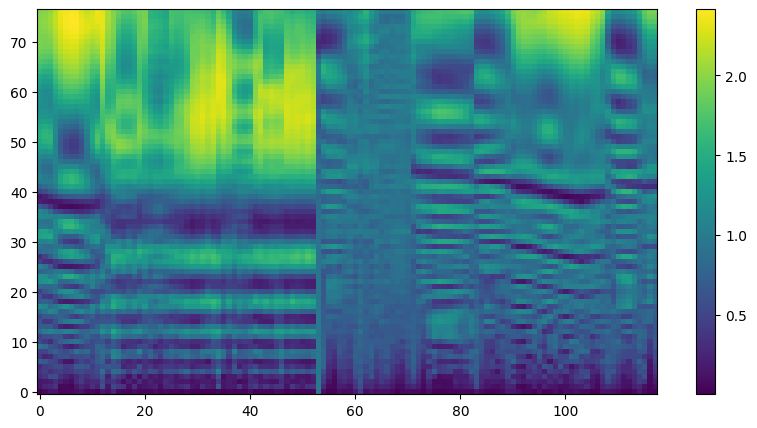

In [2]:
# plot yin output
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(out[0].cpu().numpy(), aspect="auto", origin="lower")
plt.colorbar()
plt.show()

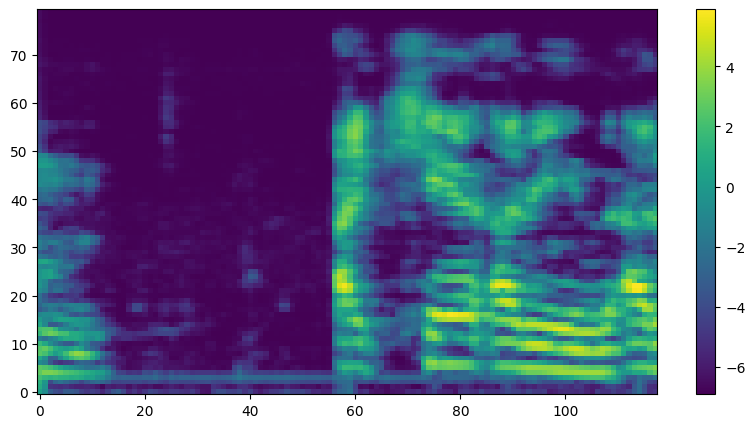

In [3]:
# plot mel spectrogram
from data import MelTransform

mel_transform = MelTransform(cfg.data.mel_transform)
mel = mel_transform(x)

plt.figure(figsize=(10, 5))
plt.imshow(mel[0].cpu().numpy(), aspect="auto", origin="lower")
plt.colorbar()
plt.show()

In [4]:
mel.shape, out.shape

(torch.Size([1, 80, 118]), torch.Size([1, 77, 118]))

In [5]:
n_frames

tensor([118])